A tutorial on time series data preparation and EDA.You require following datasets.
*   airline-passengers
*   champagne
*   daily-minimum-temperatures
*   shampoo-sales










In [1]:
#Disable warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import math as math
from scipy.stats import boxcox
from random import randrange
from random import seed
from random import random
from random import gauss

In [3]:
# load dataset
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
print(type(series))

<class 'pandas.core.series.Series'>


In [4]:
#Peek into the data
print(series.head())


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


In [5]:
#Number of observations
print(series.size)

3650


In [6]:
#Querying by time
print(series['1981-01'])

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
1981-01-07    15.8
1981-01-08    17.4
1981-01-09    21.8
1981-01-10    20.0
1981-01-11    16.2
1981-01-12    13.3
1981-01-13    16.7
1981-01-14    21.5
1981-01-15    25.0
1981-01-16    20.7
1981-01-17    20.6
1981-01-18    24.8
1981-01-19    17.7
1981-01-20    15.5
1981-01-21    18.2
1981-01-22    12.1
1981-01-23    14.4
1981-01-24    16.0
1981-01-25    16.5
1981-01-26    18.7
1981-01-27    19.4
1981-01-28    17.2
1981-01-29    15.5
1981-01-30    15.1
1981-01-31    15.4
Name: Temp, dtype: float64


In [7]:
#Summary statistics of the data
print(series.describe())

count    3650.000000
mean       11.177753
std         4.071837
min         0.000000
25%         8.300000
50%        11.000000
75%        14.000000
max        26.300000
Name: Temp, dtype: float64


In [8]:
# create a lag feature
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
var = pd.DataFrame(series.values)
dataframe = pd.concat([var.shift(1), var], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

      t   t+1
0   NaN  20.7
1  20.7  17.9
2  17.9  18.8
3  18.8  14.6
4  14.6  15.8


In [9]:
# create multiple lag features
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
var = pd.DataFrame(series.values)
dataframe = pd.concat([var.shift(3), var.shift(2), var.shift(1), var], axis=1)
dataframe.columns = ['t-2', 't-1', 't', 't+1']
print(dataframe.head(5))

    t-2   t-1     t   t+1
0   NaN   NaN   NaN  20.7
1   NaN   NaN  20.7  17.9
2   NaN  20.7  17.9  18.8
3  20.7  17.9  18.8  14.6
4  17.9  18.8  14.6  15.8


In [10]:
# create a rolling mean feature for few lag observations
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
var = pd.DataFrame(series.values)
shifted = var.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = pd.concat([means, var], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head(5))

   mean(t-1,t)   t+1
0          NaN  20.7
1          NaN  17.9
2        19.30  18.8
3        18.35  14.6
4        16.70  15.8


In [11]:
# create expanding window features for all lag observations
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
var = pd.DataFrame(series.values)
window = var.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), var.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8


In [12]:
# create date and time features
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
dataframe = pd.DataFrame()
dataframe['month'] = [series.index[i].month for i in range(len(series))]
dataframe['day'] = [series.index[i].day for i in range(len(series))]
dataframe['temperature'] = [series[i] for i in range(len(series))]
print(dataframe.head(5))

   month  day  temperature
0      1    1         20.7
1      1    2         17.9
2      1    3         18.8
3      1    4         14.6
4      1    5         15.8


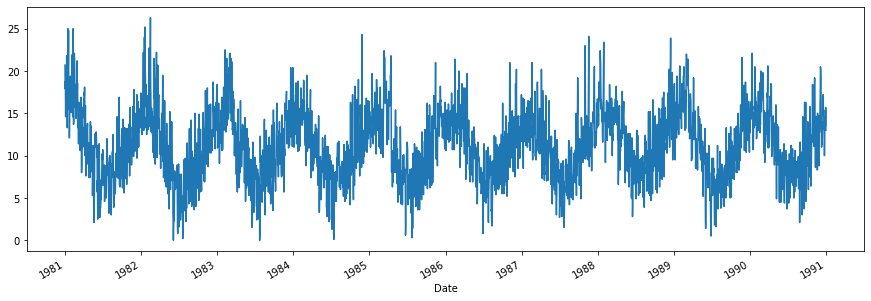

In [13]:
# create a line plot
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
series.plot(figsize=(15,5))
pyplot.show()

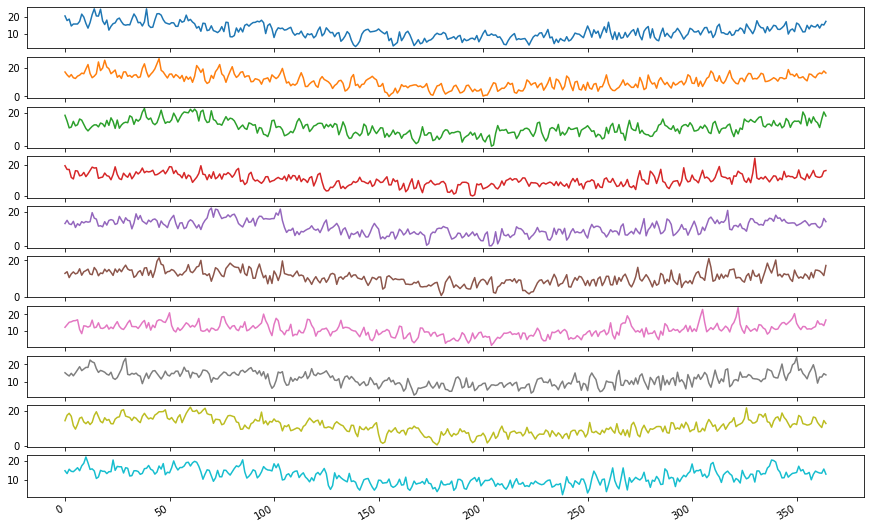

In [14]:
# create yearly (stacked) line plots
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False,figsize=(15, 10))
pyplot.show()

<AxesSubplot:xlabel='Temp', ylabel='Density'>

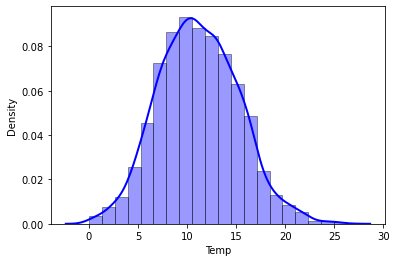

In [15]:
#Create histogram with density plot
import seaborn as sns
sns.distplot(series, hist=True, kde=True,
             bins=20,              
             color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

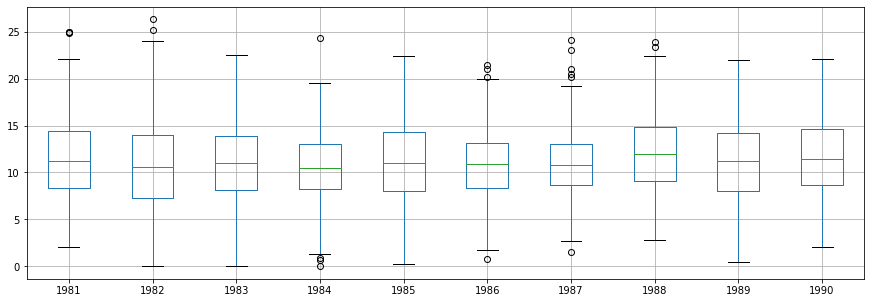

In [16]:
# create a boxplot of yearly data
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot(figsize=(15,5))
pyplot.show()

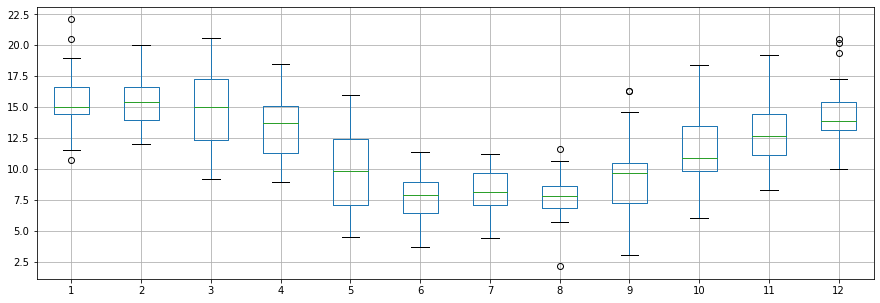

In [17]:
# create a monthly boxplots
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
single_year = series['1990']
groups = single_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot(figsize=(15,5))
pyplot.show()

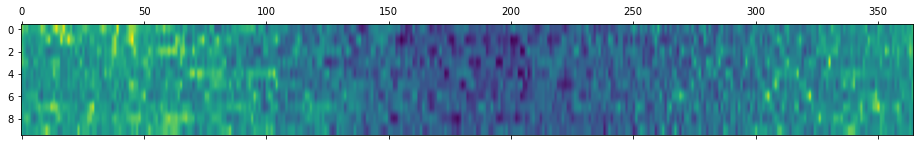

In [18]:
# create a heat map of yearly data
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

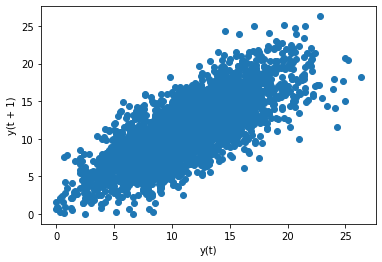

In [19]:
# create a scatter plot
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)
lag_plot(series)
pyplot.show()

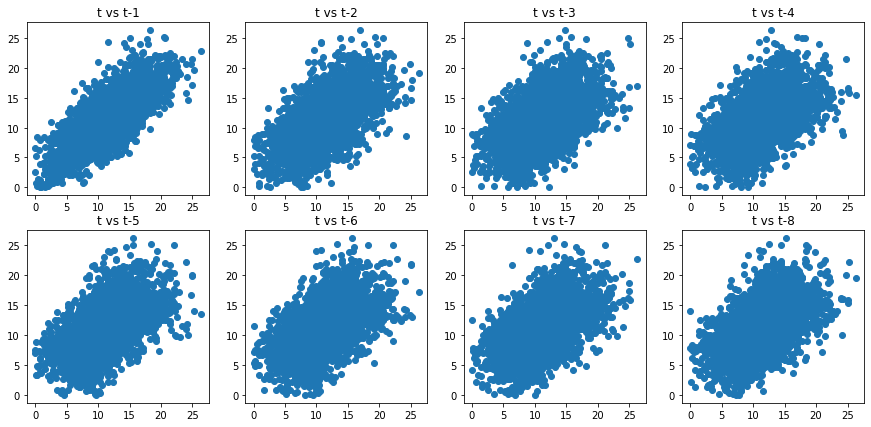

In [20]:
# create multiple scatter plots
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)
values = pd.DataFrame(series.values)
lags = 8
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1,figsize=(15,7))
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

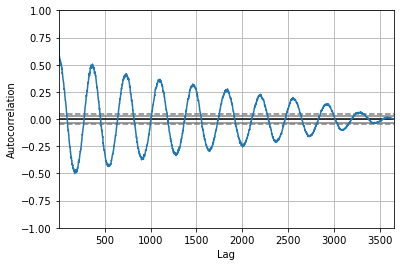

In [21]:
# create an autocorrelation plot
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

In [22]:
# upsample to daily intervals with linear interpolation
def parser(x):
  return pd.datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True,
squeeze=True, date_parser=parser)
upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(31))

Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
1901-01-06    246.629032
1901-01-07    242.754839
1901-01-08    238.880645
1901-01-09    235.006452
1901-01-10    231.132258
1901-01-11    227.258065
1901-01-12    223.383871
1901-01-13    219.509677
1901-01-14    215.635484
1901-01-15    211.761290
1901-01-16    207.887097
1901-01-17    204.012903
1901-01-18    200.138710
1901-01-19    196.264516
1901-01-20    192.390323
1901-01-21    188.516129
1901-01-22    184.641935
1901-01-23    180.767742
1901-01-24    176.893548
1901-01-25    173.019355
1901-01-26    169.145161
1901-01-27    165.270968
1901-01-28    161.396774
1901-01-29    157.522581
1901-01-30    153.648387
1901-01-31    149.774194
Freq: D, Name: Sales, dtype: float64


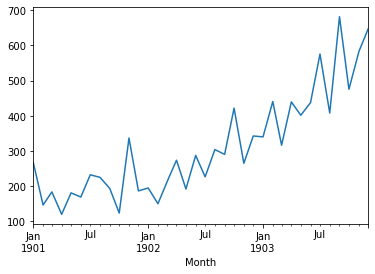

In [23]:
#Plot linearly interpolated data
interpolated.plot()
pyplot.show()

In [24]:
# upsample to daily intervals with spline interpolation
def parser(x):
  return pd.datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True,
squeeze=True, date_parser=parser)
upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='spline', order=2)
print(interpolated.head(31))

Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
1901-01-06    231.727880
1901-01-07    225.575149
1901-01-08    219.651553
1901-01-09    213.957094
1901-01-10    208.491770
1901-01-11    203.255582
1901-01-12    198.248529
1901-01-13    193.470612
1901-01-14    188.921831
1901-01-15    184.602185
1901-01-16    180.511676
1901-01-17    176.650301
1901-01-18    173.018063
1901-01-19    169.614960
1901-01-20    166.440993
1901-01-21    163.496161
1901-01-22    160.780465
1901-01-23    158.293905
1901-01-24    156.036481
1901-01-25    154.008192
1901-01-26    152.209039
1901-01-27    150.639021
1901-01-28    149.298139
1901-01-29    148.186393
1901-01-30    147.303783
1901-01-31    146.650308
Freq: D, Name: Sales, dtype: float64


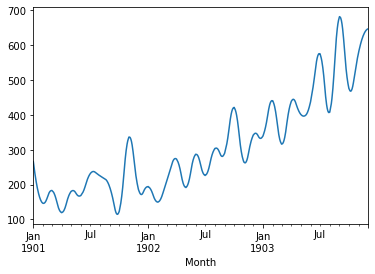

In [25]:
#Plot spline sampled data
interpolated.plot()
pyplot.show()

In [26]:
# downsample to quarterly intervals
def parser(x):
  return pd.datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True,
squeeze=True, date_parser=parser)
resample = series.resample('Q')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
Freq: Q-DEC, Name: Sales, dtype: float64


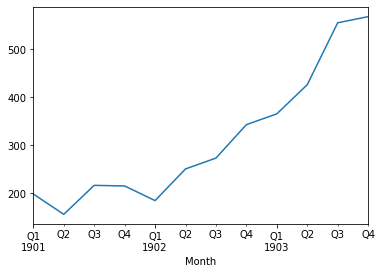

In [27]:
#Plot quarterly sampled data
quarterly_mean_sales.plot()
pyplot.show()

Power Transformation

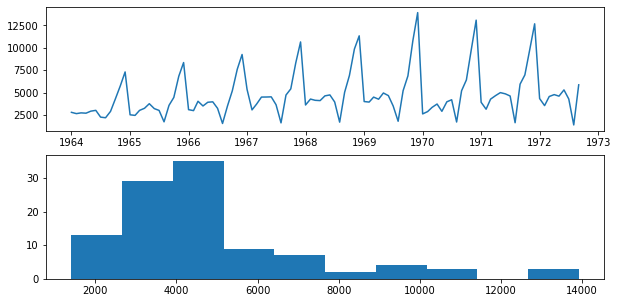

In [28]:
# load and plot a time series
series = pd.read_csv('champagne.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
pyplot.figure(1, figsize=(10,5))
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

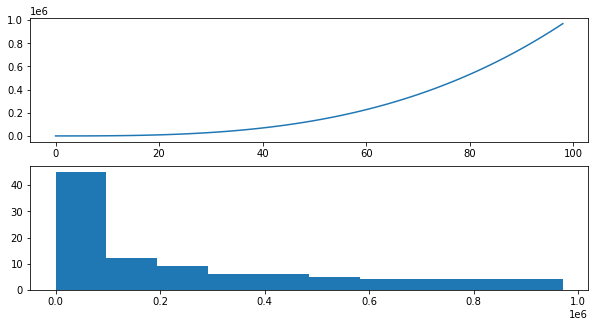

In [29]:
# Generate a cubic time series
series = [i**3 for i in range(1,100)]
pyplot.figure(1,figsize=(10,5))
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

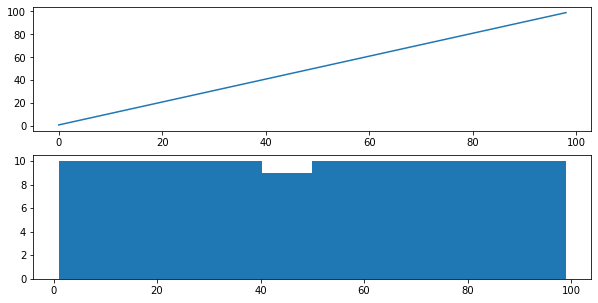

In [30]:
# cbrt transform
transform = series = np.cbrt(series)
pyplot.figure(1,figsize=(10,5))
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

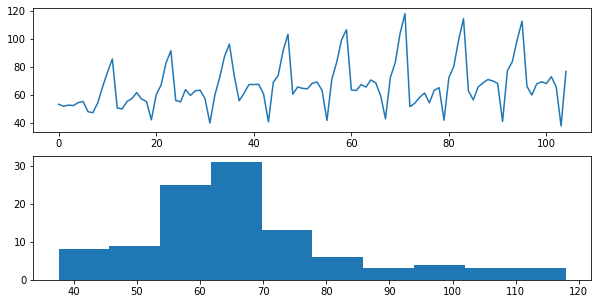

In [31]:
# square root transform a time series
series = pd.read_csv('champagne.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['Sales']
dataframe['Sales'] = np.sqrt(dataframe['Sales'])
pyplot.figure(1,figsize=(10,5))
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Sales'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Sales'])
pyplot.show()

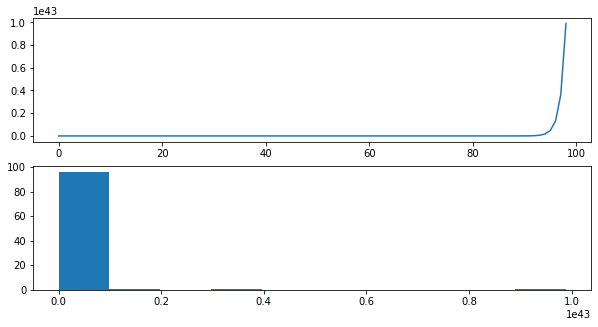

In [32]:
# create and plot an exponential time series
series = [math.exp(i) for i in range(1,100)]
pyplot.figure(1,figsize=(10,5))
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

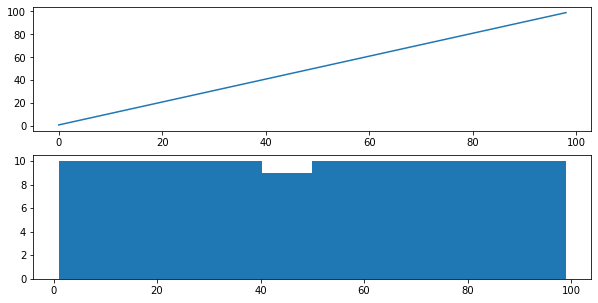

In [33]:
# log transform a simulated exponential time series
transform = np.log(series)
pyplot.figure(1,figsize=(10,5))
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

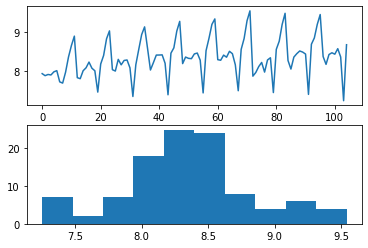

In [34]:
# log transform a time series
series = pd.read_csv('champagne.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['Sales']
dataframe['Sales'] = np.log(dataframe['Sales'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Sales'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Sales'])
pyplot.show()

Box-cox Transformation

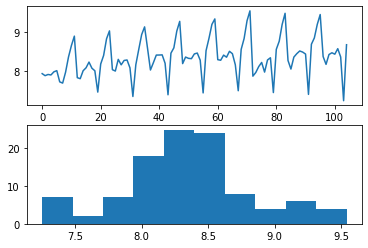

In [35]:
# manually box-cox transform a time series
series = pd.read_csv('champagne.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['Sales']
dataframe['Sales'] = boxcox(dataframe['Sales'], lmbda=0.0)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Sales'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Sales'])
pyplot.show()

Lambda: -0.152542


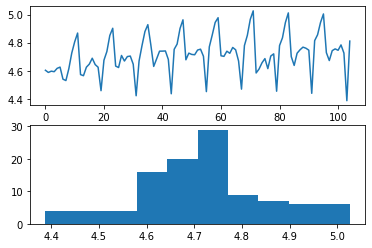

In [36]:
# automatically box-cox transform a time series
series = pd.read_csv('champagne.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['Sales']
dataframe['Sales'], lam = boxcox(dataframe['Sales'])
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Sales'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Sales'])
pyplot.show()

White noise

In [37]:
# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = pd.Series(series)

In [38]:
# summary stats
print(series.describe())

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


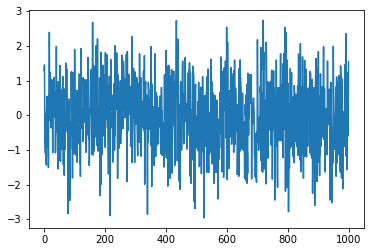

In [39]:
# line plot
series.plot()
pyplot.show()

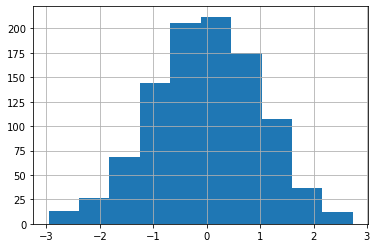

In [40]:
# histogram plot
series.hist()
pyplot.show()

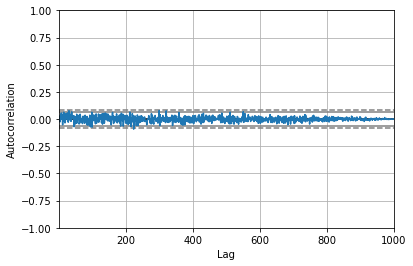

In [41]:
# autocorrelation
autocorrelation_plot(series)
pyplot.show()

Random Walk

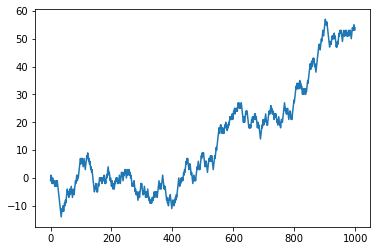

In [42]:
# create and plot a random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
  movement = -1 if random() < 0.5 else 1
  value = random_walk[i-1] + movement
  random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

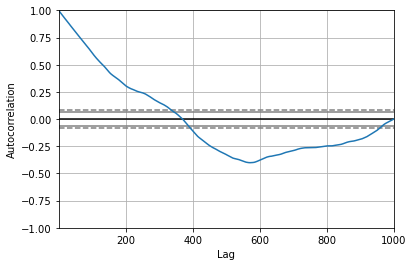

In [43]:
# plot the autocorrelation of a random walk
autocorrelation_plot(random_walk)
pyplot.show()

In [44]:
# statistical test
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


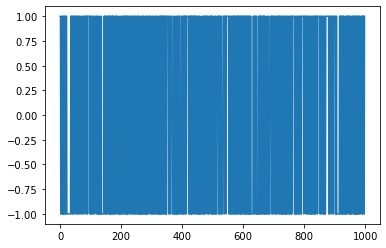

In [45]:
# calculate and plot a differenced random walk
# take difference
diff = list()
for i in range(1, len(random_walk)):
  value = random_walk[i] - random_walk[i - 1]
  diff.append(value)
# line plot
pyplot.plot(diff)
pyplot.show()

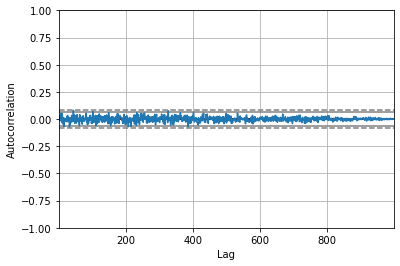

In [46]:
# plot the autocorrelation of a differenced random walk
# line plot
autocorrelation_plot(diff)
pyplot.show()

Decompose Time Series

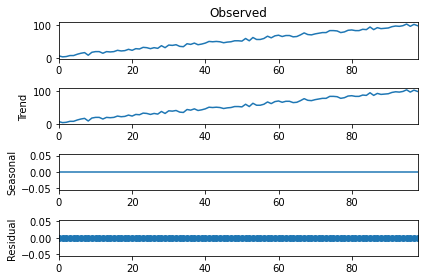

In [47]:
# additive decompose a simulated additive time series
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()

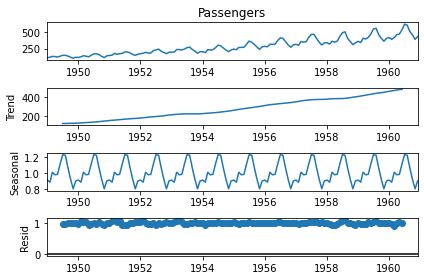

In [48]:
# multiplicative decompose time series
series = pd.read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()